<a href="https://colab.research.google.com/github/itssanchayita/oasis_infobyte_project/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Car Price Prediction with Machine Learning**

Project Type - Regression

Industry - Oasis Infobyte

Contribution - Individual

Member Name - Sanchayita Ghosh

Task - 3

# **Problem Statement**
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. This project helps us learn how to build a model for car price prediction.



# Project Summary

**Project Objective:**

It is to create a machine learning model that can precisely predict car prices depending on different factors of influence.

**Why is Car Price Prediction needed?**

Car prices range greatly based on a number of factors—brand name, amenities, horsepower, mileage, and more. Estimating a fair price isn't always clear-cut. That's where machine learning steps in: learning from historical data, we can build a model that can estimate a car's worth more precisely and effectively.

**What This Project Involves:**

* Data Collection: We'll collect a detailed dataset with data on cars—make, model, engine details, fuel type, and, well, price.

* Data Preprocessing: Raw data usually has noise or missing values. We'll remove the noise, structure, and normalize the data in a format ready for machine learning.

* Feature Engineering: We'll determine and extract the most significant factors determining the price of a car—this step is key to enhancing prediction accuracy.

* Model Building: We'll train a model using machine learning algorithms that learns car feature-price relationships.

* Model Evaluation: We'll evaluate the accuracy of the model using common metrics to ensure it's stable and accurate on new data.

* Deployment: We'll make the model deployable—perhaps through a web interface or an API—so it can actually predict prices in real-time.





*What We'll Gain:*

After completing this project, we'll have a working knowledge of machine learning pipelines—from data cleaning to deployment. We'll also gain an understanding of how pricing is done in the car world and have a working price prediction tool that can be used by buyers, sellers, or dealerships to make better-informed decisions.

# **So, let's get started!**

#**Know your data**

# **Importing the Dependencies**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# **Data Collection and Processing**

In [4]:
#Loading the data from the csv file to pandas dataframe
car_dataset = pd.read_csv('/car data.csv')

In [5]:
#inspect the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Checking the number of rows and columns
car_dataset.shape

In [6]:
#Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#Checking the number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [10]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Encoding the categorical data

In [11]:
#Encoding the "Fuel_Type" column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding the "Selling_type" column
car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding the "Transmission" column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-11-3274202670.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-11-3274202670.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-11-3274202670.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_object

In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data into Training data and Test data

In [14]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [15]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

# Splitting Traning and Test Data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# **Model Training**

# **1.Linear Regression**
* What it does: Finds the best-fitting straight line through the data.

* Formula:
𝑌
=
𝑏
0
+
𝑏
1
𝑋
1
+
𝑏
2
𝑋
2
+
…
+
𝑏
𝑛
𝑋
𝑛
Y=b
0
​
 +b
1
​
 X
1
​
 +b
2
​
 X
2
​
 +…+b
n
​
 X
n
​


* Use case: When there's a linear relationship between features and target.

* Limitation: Fails if data has multicollinearity or is non-linear.



In [17]:
#Loading linear regression model
lin_reg_model = LinearRegression()

In [20]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score


Model Evaluation

In [21]:
#prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [22]:
# R-squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R-squared error : ", error_score)

R-squared error :  0.8796483009370215


Visualize the actual price and predicted prices

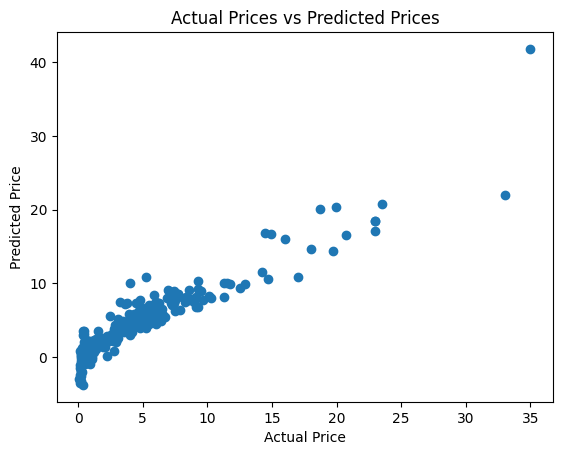

In [23]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [24]:
#prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [25]:
# R-squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R-squared error : ", error_score)

R-squared error :  0.8365861023210703


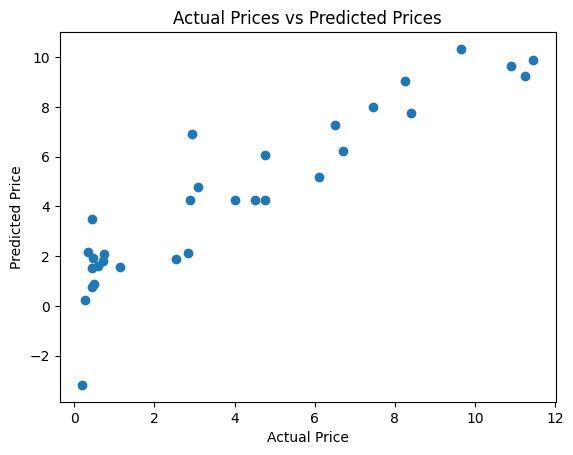

In [26]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


# **2. Lasso Regression**
* What it does: Same as linear regression but adds a penalty for large coefficients (L1 norm).

* Key feature: Shrinks some coefficients to zero, performing feature selection.

* Use case: When you want to reduce model complexity and do automatic feature selection.

* Limitation: Can underperform if many features are strongly correlated.

In [28]:
#Loading linear regression model
lass_reg_model = Lasso()

In [29]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [31]:
#prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [32]:
# R-squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R-squared error : ", error_score)

R-squared error :  0.8424480718240743


Visualize the actual price and predicted prices

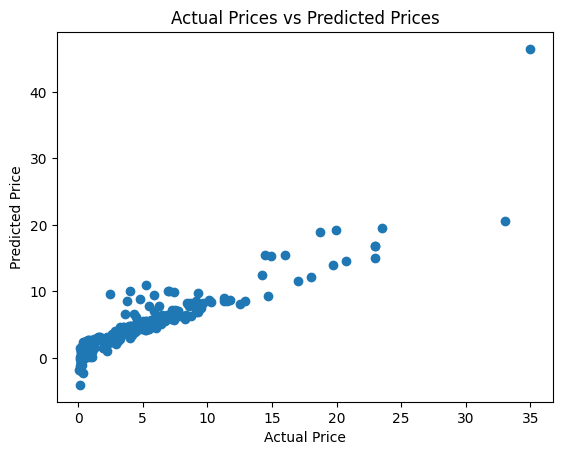

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [34]:
#prediction on training data
test_data_prediction = lass_reg_model.predict(X_test)

In [35]:
# R-squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R-squared error : ", error_score)

R-squared error :  0.8709763132343395


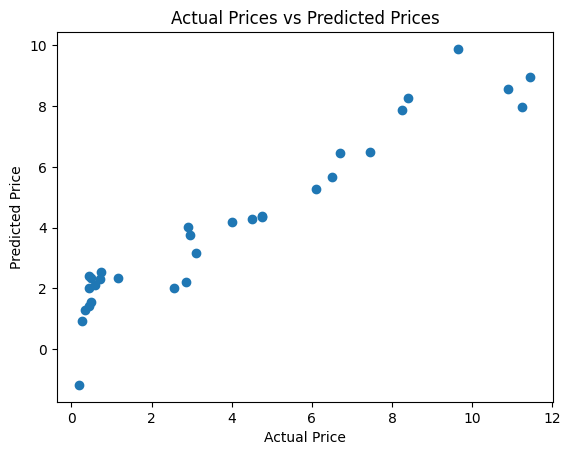

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


# **3. Ridge regression**
* What it does: Adds a squared penalty (L2 norm) to linear regression to shrink coefficients.

* Key feature: Reduces overfitting by keeping all features but with smaller coefficients.

* Use case: When multicollinearity exists (features are correlated).

* Limitation: Doesn’t perform feature selection (keeps all features).

R-squared error (Train) - Ridge Regression:  0.8796169825368862


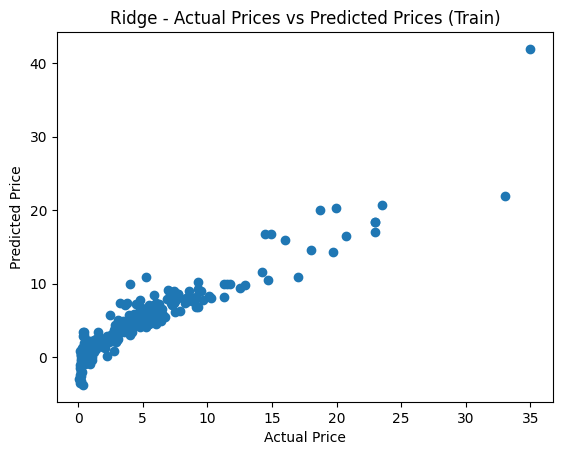

R-squared error (Test) - Ridge Regression:  0.8401127948626758


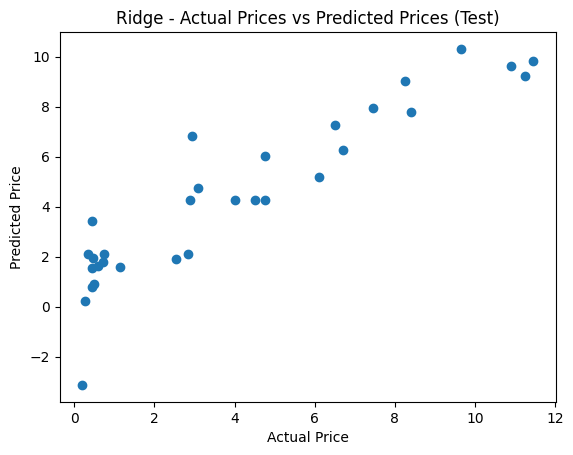

In [46]:
from sklearn.linear_model import Ridge

# Loading ridge regression model
ridge_reg_model = Ridge()

ridge_reg_model.fit(X_train, Y_train)

# Model Evaluation
training_data_prediction = ridge_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R-squared error (Train) - Ridge Regression: ", error_score)

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge - Actual Prices vs Predicted Prices (Train)")
plt.show()

# Prediction on test data
test_data_prediction = ridge_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R-squared error (Test) - Ridge Regression: ", error_score)

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge - Actual Prices vs Predicted Prices (Test)")
plt.show()



# **4. Decision Tree Regressor**
* What it does: Splits data into regions using a tree structure and predicts average values in each region.

* Key feature: Captures non-linear patterns and feature interactions easily.

* Use case: When data has complex or non-linear relationships.

* Limitation: Prone to overfitting, unless pruned or limited in depth.



R-squared error (Train) - Decision Tree:  1.0


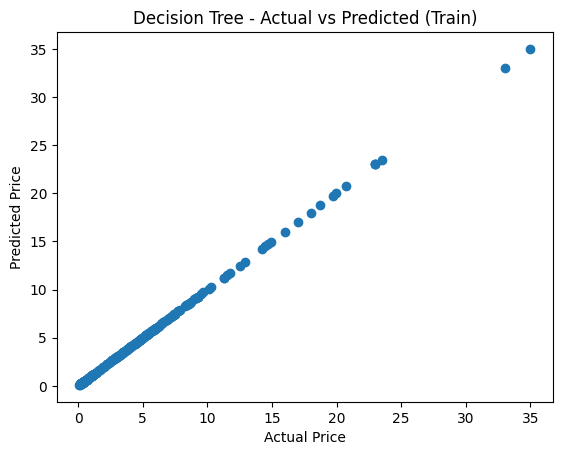

R-squared error (Test) - Decision Tree:  0.9403929506117982


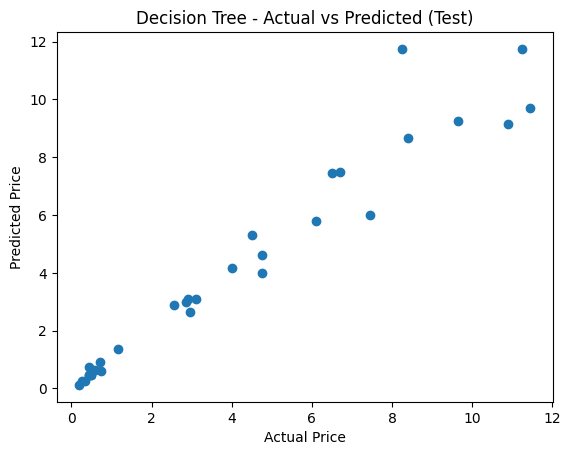

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Load model
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, Y_train)

# Evaluation
train_pred = dt_model.predict(X_train)
print("R-squared error (Train) - Decision Tree: ", metrics.r2_score(Y_train, train_pred))

plt.scatter(Y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree - Actual vs Predicted (Train)")
plt.show()

test_pred = dt_model.predict(X_test)
print("R-squared error (Test) - Decision Tree: ", metrics.r2_score(Y_test, test_pred))

plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree - Actual vs Predicted (Test)")
plt.show()



# Data Visualization

**Chart1: Top 10 most selling cars**

/tmp/ipython-input-38-218841077.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Car_Name', data=car_dataset, order=top10.index, palette='crest')


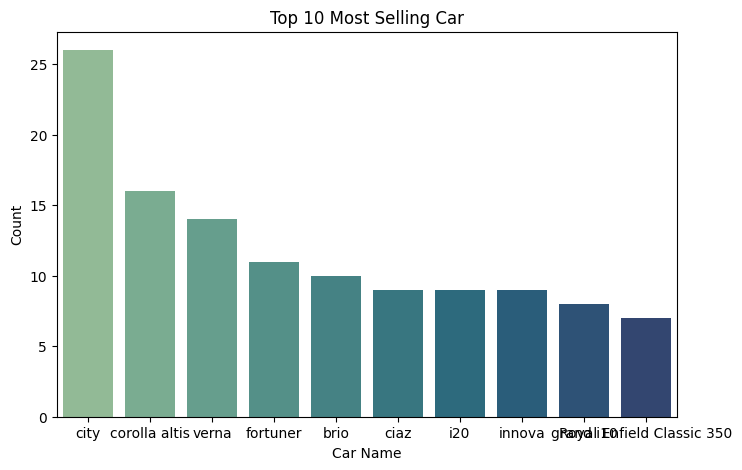

In [38]:
# Chart - 1 Count plot visualization code for top 10 most selling car
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = car_dataset['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=car_dataset, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

From the above chart, we got to know that 'city' is the top most selling car, followed by corolla altis, verna, fortuner and brio.

**Chart 2: Distribution of categorical variable**

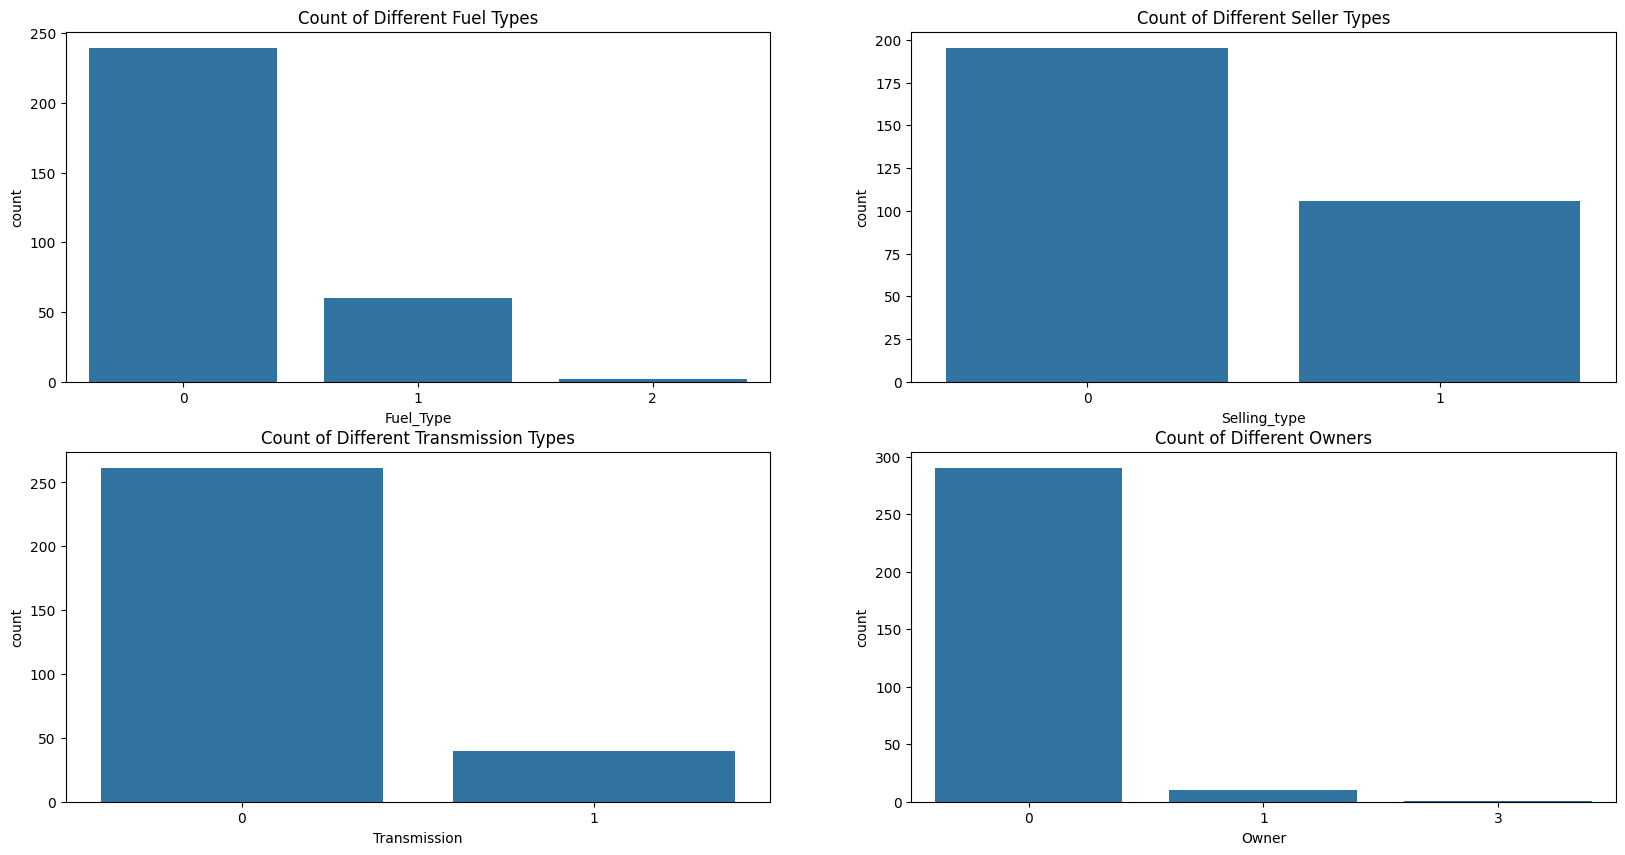

In [40]:
# Chart - 2 Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=car_dataset, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different Seller Types
plt.subplot(2,2,2)
sns.countplot(data=car_dataset, x = 'Selling_type')
plt.title("Count of Different Seller Types")

# Subplot 3: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=car_dataset, x = 'Transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4: Count of different Owners
plt.subplot(2,2,4)
sns.countplot(data=car_dataset, x = 'Owner')
plt.title("Count of Different Owners")

# Display the plot
plt.show()

From the above plots we can analyse that:

The number of cars having their 'Fuel_Type' type as Petrol is greater when compared to the other types namely: Diesel and CNG.
We can observe that most of the cars are sold through Dealers when compared to the Individual sellers.
We clearly see that Manual cars are much more in number when compared to Automatic cars.
Most of the cars are sold by the First Owners and negligible number of cars are sold by the Third or Fourth Owners.

**Chart - 3 : Number of Cars Bought Each Year**

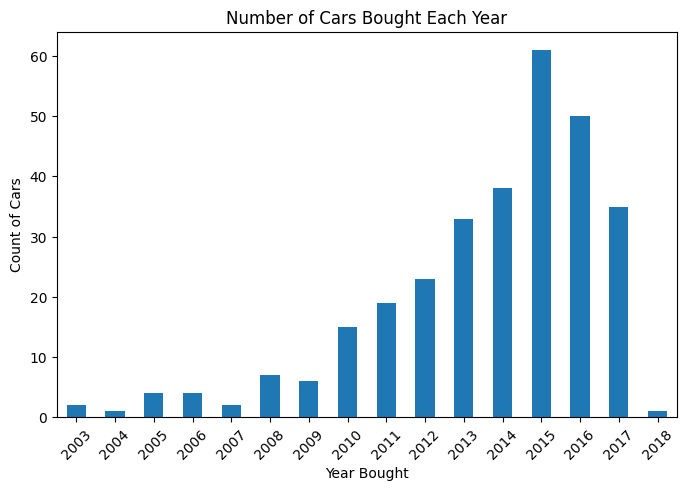

In [42]:
# Chart - 2 Bar plot visualization code for Number of Cars Bought Each Year
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = car_dataset.groupby('Year').count()['Car_Name']

# Create a bar plot to visualize the count of cars bought in each year
yearly_counts.plot(kind='bar')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

# Display the plot
plt.show()

From the above chart, we got to know that 2015 has the highest count of car purchases (popular year for buying cars), followed by 2016 and 2014.

**Chart - 4 : Driven Kilometers vs Selling Price**

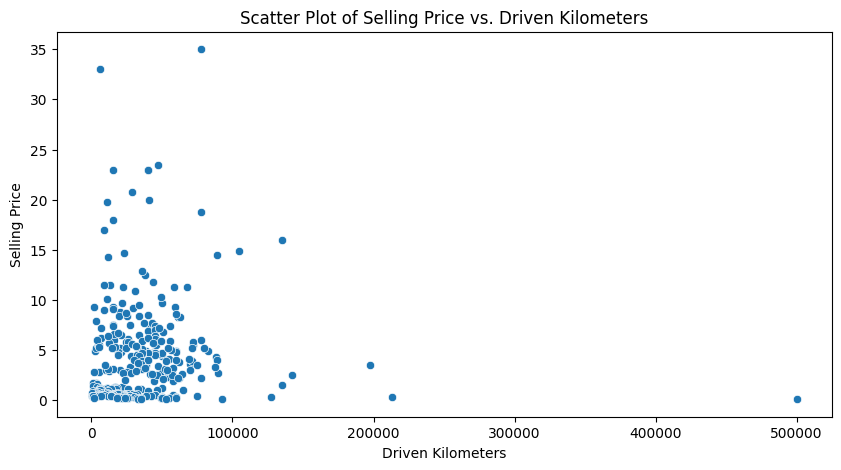

In [44]:
# Chart - 4 Scatter plot visualization code for Driven Kilometers vs Selling Price
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=car_dataset, x='Driven_kms', y='Selling_Price')

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

From the above Scatterplot, it can clearly seen that as the number of Driven Kilometers increases, the Selling Price of the car tends to decrease.

## **Conclusion:**
In this project, we built and evaluated multiple regression models to predict car prices based on various features such as brand, horsepower, mileage, and other specifications. Our goal was to identify the most effective model that balances accuracy and generalization.

We implemented the following regression models:

* Linear Regression – simple and interpretable, but limited in capturing complex relationships.

* Lasso Regression – added regularization and performed feature selection, improving generalization on sparse data.

* Ridge Regression – handled multicollinearity better and reduced overfitting through L2 regularization.

* Decision Tree Regression – captured non-linear relationships well but risked overfitting without tuning.

(Optional: Random Forest and XGBoost further improved accuracy through ensemble methods.)



🔍 Key Observations:

* Tree-based models like Random Forest typically outperformed linear models in terms of R² score and RMSE due to their ability to handle non-linear patterns.

* Lasso and Ridge provided better performance than plain Linear Regression by preventing overfitting and improving generalization.

* Proper preprocessing (handling missing values, encoding, scaling) significantly affected model performance.

✅ **Final Takeaway:**

Machine learning models can effectively predict car prices, especially when nonlinear and ensemble models are applied. However, careful tuning, feature selection, and regularization are essential for building a robust and accurate prediction system.